In [1]:
from mnist_loader import load_data_wrapper
import numpy as np
import random 
import matplotlib.pyplot as plt


In [2]:
training_data , validation_data , test_data = load_data_wrapper()

In [3]:
def plot_images(images):
    """ Plot a list of MNIST images.
        Argument images is a list of (image, label) tuples. 
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(images))
    for j, ax in enumerate(axes):
        ax.matshow(images[j][0].reshape(28,28), cmap = plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    

In [4]:
def predict(images , w1 , w2 , B1 , B2 ):
    prediction = []
    for im in images:
        a = apply_NN(im[0] , w1 , w2 , B1 , B2 )
        prediction.append(np.argmax(a))
    return prediction


In [5]:
def sigmoid(x):
    """sigmoid function"""
    return 1/(1+ np.exp(-x))


In [6]:
def sigmoid_prime(x):
    """Derivation of sigmoid function"""
    return sigmoid(x) * (1-sigmoid(x))

In [7]:
def apply_NN(x , W1 , W2 , B1 , B2):
    z1 = np.dot(W1,x) + B1
    A1 = sigmoid(z1)
    z2 = np.dot(W2,A1) + B2
    A2 = sigmoid(z2)
    return A2


In [8]:
def vectorize_mini_batch(mini_batch):
    """Given a minibatch of (image,label) tuples 
    return the tuple X,Y where X contains all of the images and Y contains
    all of the labels stacked horizontally """
    mini_batch_x = []
    mini_batch_y = []
    for i in range(0, len(mini_batch)):
        mini_batch_x.append(mini_batch[i][0])
        mini_batch_y.append(mini_batch[i][1])
    X = np.hstack(mini_batch_x)
    Y = np.hstack(mini_batch_y)
    return X, Y 

In [9]:
def SGD(training_data , epochs , mini_batch_size , eta , test_data):
    """Gradient descent.
    Epochs: the number of times the entire training_data is examined.
    mini_batch_size: the number of images used to approximate the gradient 
    each step of the gradient descent.
    eta: the learning rate or the step size
    test_data: check accuracy of the model against the test_data every epoc
    """
    n = len(training_data)
    n_test = len(test_data)
    
    w1 = np.random.randn(30 , 784)
    w2 = np.random.randn(10 , 30)
    b1 = np.random.randn(30 , 1)
    b2 = np.random.randn(10 , 1)
    
    for j in range(epochs):
        random.shuffle(training_data)
        for k in range ( 0 , n , mini_batch_size):
            mini_batch =  training_data[k : k+mini_batch_size]
            x , y = vectorize_mini_batch(mini_batch)
            
            # feed forward
            z1 = np.dot(w1, x)+b1
            A1 = sigmoid(z1)
            z2 = np.dot(w2, A1)+b2
            A2 = sigmoid(z2)
            
            #backpropagate
            dz2 = 1/mini_batch_size* (A2 - y )*sigmoid_prime(z2) #fundamental equation 1
            dw2 = np.dot(dz2 , A1.T)                                         #equation 3
            db2 = 1/mini_batch_size*np.sum(dz2 , axis = 1 , keepdims = True) #equation 4
            
            dz1 = 1/mini_batch_size* np.dot(w2.T,dz2) * sigmoid_prime(z1)    #equation 2
            dw1 = np.dot(dz1,x.T)            #equation 3 
            db1 = 1/mini_batch_size*np.sum(dz1 , axis = 1 , keepdims = True )#equation 4
            
            #update paratmeters 
            w2 = w2 - eta*dw2 
            w1 = w1 - eta*dw1
            b2 = b2 - eta*db2
            b1 = b1 - eta*db1
            
        #after every Epoch, check the accuracy of model 
        test_result = [( np.argmax(apply_NN(x,w1,w2,b1,b2)) , y) for (x,y) in test_data]
        num_correct = sum(int ( x == y )  for (x, y) in test_result )
        print (" Epoch {} : {} / {}".format(j , num_correct , n_test));
        
    return w1,b1,w2,b2


In [10]:
w1 , b1 , w2 , b2 = SGD(training_data , 30 , 10 , 3 , test_data)

 Epoch 0 : 8275 / 10000
 Epoch 1 : 8674 / 10000
 Epoch 2 : 8877 / 10000
 Epoch 3 : 8983 / 10000
 Epoch 4 : 9057 / 10000
 Epoch 5 : 9109 / 10000
 Epoch 6 : 9153 / 10000
 Epoch 7 : 9174 / 10000
 Epoch 8 : 9221 / 10000
 Epoch 9 : 9223 / 10000
 Epoch 10 : 9232 / 10000
 Epoch 11 : 9236 / 10000
 Epoch 12 : 9231 / 10000
 Epoch 13 : 9272 / 10000
 Epoch 14 : 9298 / 10000
 Epoch 15 : 9301 / 10000
 Epoch 16 : 9299 / 10000
 Epoch 17 : 9321 / 10000
 Epoch 18 : 9313 / 10000
 Epoch 19 : 9305 / 10000
 Epoch 20 : 9345 / 10000
 Epoch 21 : 9325 / 10000
 Epoch 22 : 9352 / 10000
 Epoch 23 : 9345 / 10000
 Epoch 24 : 9344 / 10000
 Epoch 25 : 9369 / 10000
 Epoch 26 : 9354 / 10000
 Epoch 27 : 9349 / 10000
 Epoch 28 : 9357 / 10000
 Epoch 29 : 9361 / 10000


In [11]:
predict(training_data[0:10] , w1,w2, b1 , b2)


[7, 0, 5, 1, 8, 8, 0, 9, 0, 9]

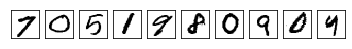

In [12]:
plot_images(training_data[0:10])